1 Week (self learn):

# ML:
1. Gradient Descent
2. Back Propagation
3. Forward Propagation
4. Loss Functions

# Models:
1. Random Forest / XGboost
2. CNN Convolutional Neural Network (segmentation/classification)
3. RNN/LSTM (Recurrent Neural Network) (Long short-term memory) - Senitment

Words ---> Vectors.  (RNN, LSTM, Transformers) - Classification problem - Supervised learning - Sentiment Analyssis

5. Transformers (LLM)
6. PCA/SVD
7. Ranking Problems (optimization)
8. Why Bayesian models suck. Maybe ok for statistical (LDA)

# Data Pre-Processing Tutorial

In [1]:
# Third-party libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Introduction to Data Preprocessing

In [2]:
from sklearn.datasets import fetch_california_housing


In [6]:
fetch_california_housing().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [8]:
housing = fetch_california_housing()

In [14]:
feats = pd.DataFrame(housing.get('data'))

In [17]:
feats.shape

(20640, 8)

In [19]:
{
    1:[1,23,3,2],
    3:['we','ew','u','i']
}

{1: [1, 23, 3, 2], 3: ['we', 'ew', 'u', 'i']}

In [60]:
test_df = pd.DataFrame({
    1:[1,23,3,2],
    3:['we','ew','u','i']
})

In [34]:
test_s = test_df[1]

In [57]:
type(test_df[1])

pandas.core.series.Series

In [58]:
type(test_df[[1]])

pandas.core.frame.DataFrame

In [46]:
test_df

,1,3
0,1,we
1,23,ew
2,3,u
3,2,i


In [44]:
test_s

0     1
1    23
2     3
3     2
Name: 1, dtype: int64

In [63]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [66]:
feats.columns = housing.get('feature_names')

In [67]:
feats

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [69]:
# Order matters
pd.DataFrame(
    housing['data'],
    columns=housing['feature_names']
)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [72]:
data_df = pd.DataFrame(
    housing['data'], 
    columns=housing['feature_names']
)
data_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [76]:
housing.get('target')

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [75]:
data_df['MedHouseValue'] = housing.get('target')

In [77]:
data_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# Creating a new column
data_df['MedHouseValue'] = housing.get('target')

In [ ]:
data_df

In [78]:
# Exercise 1: Display the dimensions of the dataset and list all the column names.
data_df.shape

(20640, 9)

In [79]:
data_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseValue'],
      dtype='object')

In [84]:
# Exercise 2: Identify the data types of each column and count how many features are numerical and how many are categorical.
data_df.dtypes

MedInc           float64
HouseAge         float64
AveRooms         float64
AveBedrms        float64
Population       float64
AveOccup         float64
Latitude         float64
Longitude        float64
MedHouseValue    float64
dtype: object

In [86]:
data_df.select_dtypes?

Signature: data_df.select_dtypes(include=None, exclude=None) -> 'Self'
Docstring:
Return a subset of the DataFrame's columns based on the column dtypes.

Parameters
----------
include, exclude : scalar or list-like
    A selection of dtypes or strings to be included/excluded. At least
    one of these parameters must be supplied.

Returns
-------
DataFrame
    The subset of the frame including the dtypes in ``include`` and
    excluding the dtypes in ``exclude``.

Raises
------
ValueError
    * If both of ``include`` and ``exclude`` are empty
    * If ``include`` and ``exclude`` have overlapping elements
    * If any kind of string dtype is passed in.

See Also
--------
DataFrame.dtypes: Return Series with the data type of each column.

Notes
-----
* To select all *numeric* types, use ``np.number`` or ``'number'``
* To select strings you must use the ``object`` dtype, but note that
  this will return *all* object dtype columns
* See the `numpy dtype hierarchy
  <https://numpy.org/doc/s

In [99]:
data_df.select_dtypes(include=['object']).shape[1]

0

In [106]:
num_numerical = data_df.select_dtypes(include=[np.number]).shape[1]

In [107]:
num_numerical

9

In [108]:
num_categorical = data_df.select_dtypes(include=['category']).shape[1]

In [109]:
print(f"Numerical features: {num_numerical}, Categorical features: {num_categorical}")

Numerical features: 9, Categorical features: 0


In [115]:
data_df.isna().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Length: 20640, dtype: int64

In [116]:
data_df.isna().sum(axis=0)

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

In [ ]:
# Exercise 3: Check for missing values in the dataset. If any, provide the number of missing values per column.
missing_values = df.isnull().sum()

In [137]:
ex_df = pd.DataFrame({
    'col1':[1,np.nan,3,2],
    'col2':['we','ew',None,'NULL'],
    'col3':['we','ew',None,'None']
})

In [140]:
ex_df

,col1,col2,col3
0,1.0,we,we
1,NaN,ew,ew
2,3.0,None,None
3,2.0,NULL,None


In [141]:
ex_df.fillna(100)

,col1,col2,col3
0,1.0,we,we
1,100.0,ew,ew
2,3.0,100,100
3,2.0,NULL,None


In [ ]:
ex_df.shape

In [142]:
# 2 Dimensional Object
ex_df[['col1']].shape

(4, 1)

In [143]:
# 1 Dimensional Object
ex_df['col1'].shape

(4,)

In [144]:
ex_df.isnull().sum()

col1    1
col2    1
col3    1
dtype: int64

In [145]:
ex_df.isnull().sum().shape

(3,)

In [146]:
ex_df.isnull().sum(axis=1).shape

(4,)

In [148]:
ex_df.isnull()

,col1,col2,col3
0,False,False,False
1,True,False,False
2,False,True,True
3,False,False,False


In [157]:
data_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [159]:
# Exercise 4: Generate a statistical summary for all numerical features (mean, median, standard deviation, etc.).

df_desc = data_df.describe()
df_desc

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [160]:
df_desc

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [166]:
l = list(range(10))

In [231]:
l = list(range(df_desc.shape[0]))
l.reverse()

In [232]:
l

[7, 6, 5, 4, 3, 2, 1, 0]

In [235]:
[7, 0, 5, 4, 3, 2, 1, 6]


[7, 0, 5, 4, 3, 2, 1, 6]

In [237]:
# Using iloc to change the order
df_desc.iloc[:,[7, 0, 5, 4, 3, 2, 1, 6]]

,Longitude,MedInc,AveOccup,Population,AveBedrms,AveRooms,HouseAge,Latitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,3.870671,3.070655,1425.476744,1.096675,5.429000,28.639486,35.631861
std,2.003532,1.899822,10.386050,1132.462122,0.473911,2.474173,12.585558,2.135952
min,-124.350000,0.499900,0.692308,3.000000,0.333333,0.846154,1.000000,32.540000
25%,-121.800000,2.563400,2.429741,787.000000,1.006079,4.440716,18.000000,33.930000
50%,-118.490000,3.534800,2.818116,1166.000000,1.048780,5.229129,29.000000,34.260000
75%,-118.010000,4.743250,3.282261,1725.000000,1.099526,6.052381,37.000000,37.710000
max,-114.310000,15.000100,1243.333333,35682.000000,34.066667,141.909091,52.000000,41.950000


In [175]:
# iloc = index location slicing
df_desc.iloc[2,:].mean()

129.50834165928168

In [176]:
# loc = location slicing
df_desc.loc['std',:].mean()

129.50834165928168

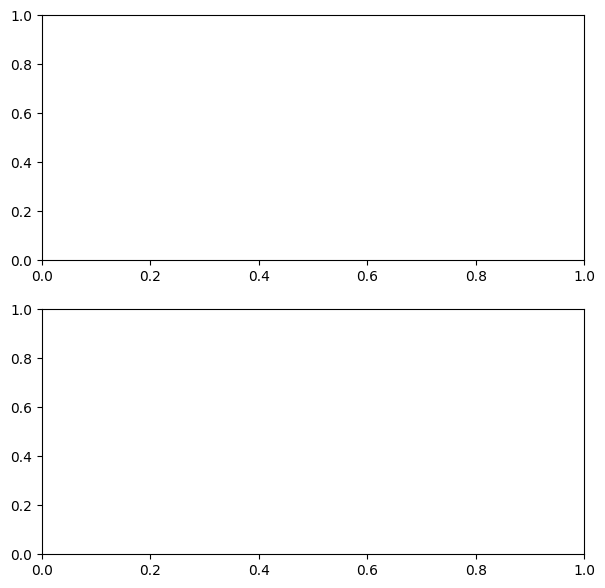

In [208]:
fig, arr = plt.subplots(
    2,
    1,
    figsize=(7,7),
    sharey=True
)

In [202]:
fig.title = "HELLO"

In [205]:
arr[0].set_title("helo")

Text(0.5, 1.0, 'helo')

In [206]:
arr[0]

<Axes: title={'center': 'helo'}>

In [198]:
arr[0]

<Axes: >

In [199]:
arr[1]

<Axes: >

tuple

In [221]:
axes

<Axes: >

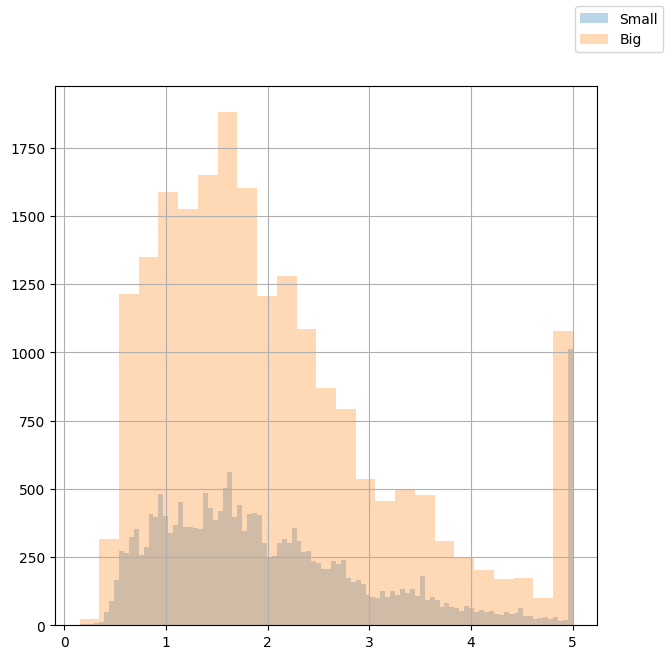

In [224]:
fig, axes = plt.subplots(1,1, figsize=(7,7),sharey=True)
data_df['MedHouseValue'].hist(
    bins=100,
    ax=axes,
    alpha = 0.3,
    label='Small'
)

data_df['MedHouseValue'].hist(
    bins=25, 
    ax=axes,
    alpha = 0.3,
    label='Big'
)
fig.legend()

<Axes: >

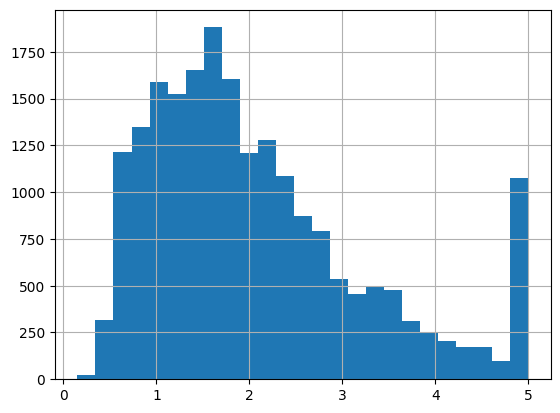

In [183]:
data_df['MedHouseValue'].value_counts()

MedHouseValue
5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Name: count, Length: 3842, dtype: int64

/Users/bipinaasi/aidi-1100/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of MedHouseValue')

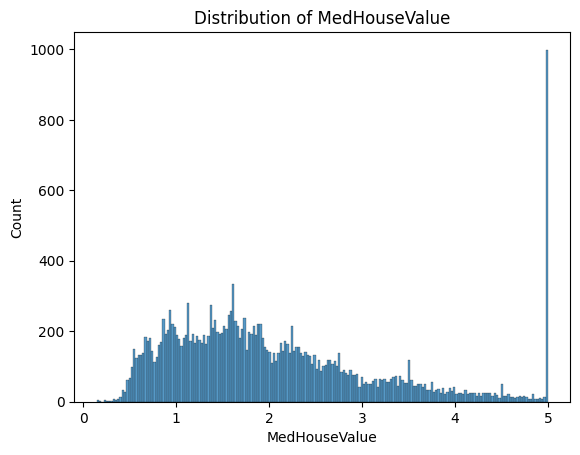

In [217]:
# Exercise 5: Plot the distribution of the target variable 'MedHouseValue' (Median house value).
ax = sns.histplot(
    data_df['MedHouseValue'],
    bins=200
)
ax.set_title('Distribution of MedHouseValue')

In [280]:
ex_df = pd.DataFrame(
    {
    'col1':[1,2,3,4,5,6],
    'col2':[6,5,4,3,2,1],
    'col3':[4.01,4,4,4,4,4],
})

In [281]:
cols = ['col1','col2']
ex_df[cols]

,col1,col2
0,1,6
1,2,5
2,3,4
3,4,3
4,5,2
5,6,1


In [282]:
ex_df.iloc[:,:2]

,col1,col2
0,1,6
1,2,5
2,3,4
3,4,3
4,5,2
5,6,1


In [283]:
ex_df.loc[:,['col1','col2']]

,col1,col2
0,1,6
1,2,5
2,3,4
3,4,3
4,5,2
5,6,1


In [284]:
ex_df.loc[0,:]

col1    1.00
col2    6.00
col3    4.01
Name: 0, dtype: float64

In [285]:
ex_df

,col1,col2,col3
0,1,6,4.01
1,2,5,4.00
2,3,4,4.00
3,4,3,4.00
4,5,2,4.00
5,6,1,4.00


In [286]:
ex_df[['col3','col1']].corr()

,col3,col1
col3,1.000000,-0.654654
col1,-0.654654,1.000000


<Axes: xlabel='col3', ylabel='col3'>

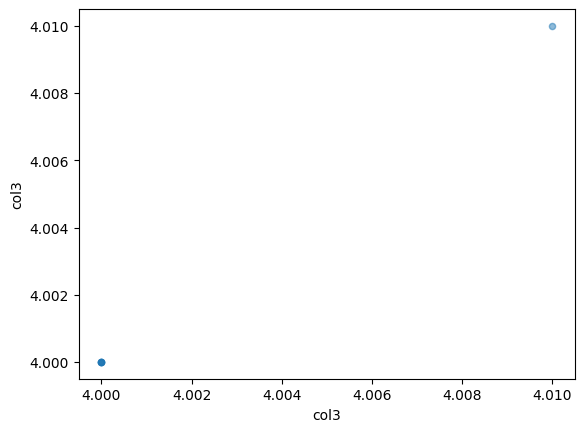

In [287]:
ex_df.plot.scatter(x="col3", y="col3", alpha=0.5)

<Axes: xlabel='col2', ylabel='col2'>

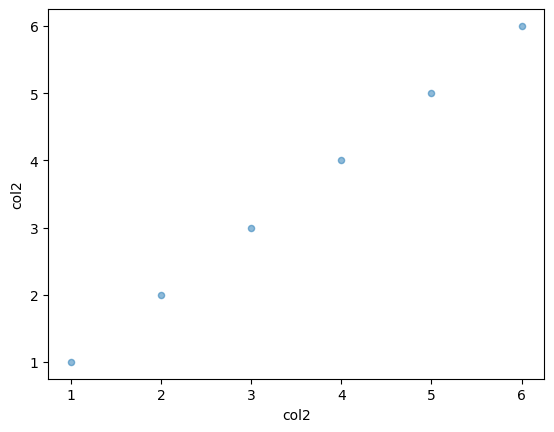

In [288]:
ex_df.plot.scatter(x="col2", y="col2", alpha=0.5)

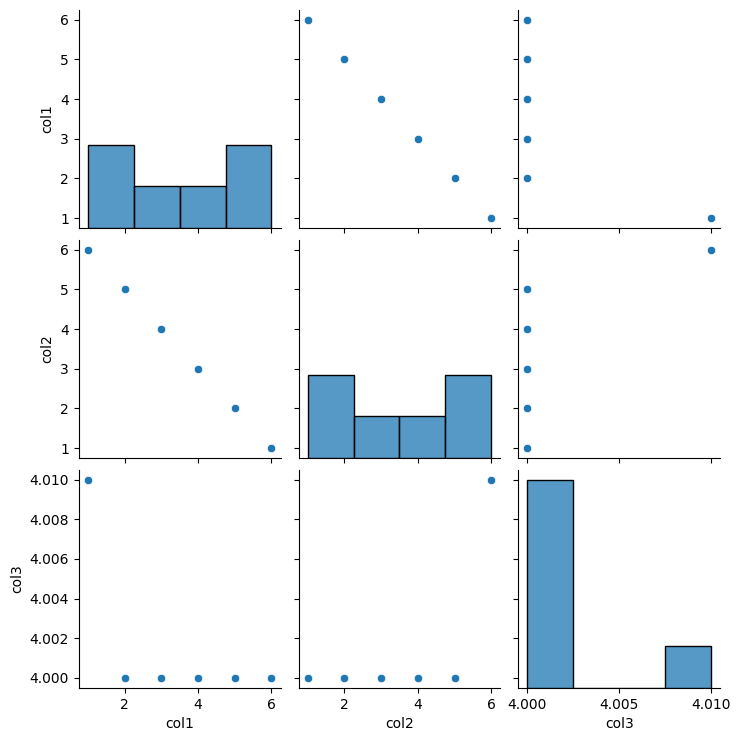

In [289]:
import warnings
warnings.filterwarnings('ignore')

sns.pairplot(ex_df)

In [292]:
ex_df.corr()

,col1,col2,col3
col1,1.000000,-1.000000,-0.654654
col2,-1.000000,1.000000,0.654654
col3,-0.654654,0.654654,1.000000


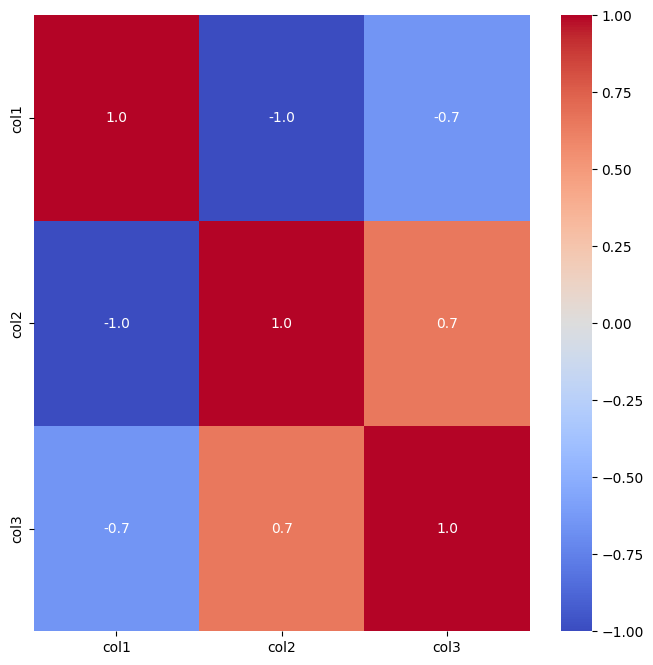

In [295]:
# Exercise 6: Create a correlation matrix heatmap for the dataset.

plt.figure(figsize=(8, 8))
sns.heatmap(ex_df.corr(), annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

In [293]:
sns.heatmap?

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

In [ ]:
# Exercise 6: Create a correlation matrix heatmap for the dataset.

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [305]:
data_df.corr()['MedHouseValue'].sort_values().tail(4)

HouseAge         0.105623
AveRooms         0.151948
MedInc           0.688075
MedHouseValue    1.000000
Name: MedHouseValue, dtype: float64

In [308]:
# ORDER IS IMPORTANT when applying methods/functions
data_df.corr()['MedHouseValue'].abs().sort_values()

AveOccup         0.023737
Population       0.024650
Longitude        0.045967
AveBedrms        0.046701
HouseAge         0.105623
Latitude         0.144160
AveRooms         0.151948
MedInc           0.688075
MedHouseValue    1.000000
Name: MedHouseValue, dtype: float64

In [314]:
data_df.corr()['MedHouseValue'].abs().sort_values(ascending=False)

MedHouseValue    1.000000
MedInc           0.688075
AveRooms         0.151948
Latitude         0.144160
HouseAge         0.105623
AveBedrms        0.046701
Longitude        0.045967
Population       0.024650
AveOccup         0.023737
Name: MedHouseValue, dtype: float64

In [312]:
# Exercise 7: Identify the top 3 features that have the highest positive correlation with 'MedHouseValue'.

correlations = data_df.corr()['MedHouseValue'].sort_values(ascending=False)
top_3_features = correlations.index[1:4]
print("Top 3 features positively correlated with MedHouseValue:", top_3_features.tolist())

Top 3 features positively correlated with MedHouseValue: ['MedInc', 'AveRooms', 'HouseAge']


In [317]:
data_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [318]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [319]:
import seaborn as sns
import pandas as pd


In [320]:
titanic_df = sns.load_dataset('titanic')


In [330]:
m = titanic_df['embark_town'] == 'Southampton'

titanic_df[m].reset_index(drop=True)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
2,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
3,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
4,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
640,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
641,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
642,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [323]:
titanic_df['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [324]:
pd.get_dummies(titanic_df['class']).astype(int)

,First,Second,Third
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

le.fit_transform(titanic_df['class'])

In [ ]:
le = LabelEncoder()

le.fit_transform(titanic_df['class'])

In [ ]:
pd.get_dummies?

In [ ]:
# Class has an order associated with it. Can rank.
pd.get_dummies(titanic_df['class']).astype(int)

In [ ]:
titanic_df[['sibsp','parch']].hist()

In [ ]:
titanic_df['family_size'] = titanic_df['sibsp'] + titanic_df['parch']

In [ ]:
titanic_df

In [ ]:
# Drop the columns
titanic_df = titanic_df.drop('class', axis=1)

In [ ]:
# Rename columns
titanic_df.rename(columns={'who':'whom'})

In [ ]:
# Change the data type 
titanic_df['who'].astype('category')

In [ ]:
# Filter the DataFrame
m = titanic_df['who'] == 'woman'

In [ ]:
titanic_df[m].reset_index()

In [ ]:
titanic_df[m].reset_index(drop=True)

In [ ]:
# Exercise 1: Identify columns with missing values and calculate the percentage of missing values for each.
(titanic_df.isna().sum() / titanic_df.shape[0]).round(2)

In [ ]:
# Exercise 2: Fill missing 'age' values with the median age grouped by 'sex' and 'pclass'.


In [ ]:
# Exercise 3: Replace missing values in 'embarked' with the mode of the column.


In [ ]:
# Exercise 3: Replace missing values in 'embarked' with the mode of the column.

In [ ]:
# Exercise 4: Detect and remove outliers in the 'fare' column using the Interquartile Range (IQR) method.

Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['fare'] < (Q1 - 1.5 * IQR)) | (df['fare'] > (Q3 + 1.5 * IQR)))]

In [ ]:
# Exercise 7: Remove duplicate rows in the dataset.

In [ ]:
# Exercise 8: Verify that there are no remaining missing values in the dataset.

# Data Reshaping


In [ ]:
import pandas as pd

# Sample data
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
    'SubCategory': ['X', 'X', 'Y', 'Y', 'X', 'Y'],
    'Value': [10, 15, 10, 20, 15, 25]
}

df = pd.DataFrame(data)


In [ ]:
grouped = df.groupby(['Category', 'SubCategory']).sum()
grouped

In [ ]:
df.pivot_table(values='Value', index=['Category', 'SubCategory'], aggfunc='sum').reset_index()


In [ ]:
df.pivot_table(values='Value', index='Category', columns='SubCategory', aggfunc='sum', fill_value=0)



In [ ]:
df.pivot_table(values='Value', index='Category', columns='SubCategory', aggfunc='sum', fill_value=0)



In [ ]:
df.pivot_table(values='Value', index='Category', columns='SubCategory', aggfunc=['sum', 'mean'], fill_value=0)



In [ ]:
df.groupby(['Category','SubCategory']).agg({'Value': ['sum', 'mean']})


In [ ]:
# melt turns columns into rows, creating two new columns: one for the variable name and one for the value.



In [ ]:
pivot = df.pivot_table(values='Value', index='Category', columns='SubCategory', aggfunc='sum', fill_value=0)
pivot

In [ ]:
pivot.reset_index().melt(id_vars='Category', value_vars=['X', 'Y'], var_name='SubCategory', value_name='Value')



In [ ]:
# 7. Reindexing and Alignment

# Using the Stock Prices dataset:

import pandas as pd
import numpy as np

# Assume we have stock data for two companies
dates = pd.date_range('2020-01-01', periods=100)
stock_a = pd.DataFrame({'Price': np.random.rand(100).cumsum()}, index=dates)
stock_b = pd.DataFrame({'Price': np.random.rand(80).cumsum()}, index=dates[:80])

In [ ]:
stock_a

In [ ]:
stock_b

In [ ]:
# Exercise 1: Reindex stock_b to have the same index as stock_a, forward-filling missing values.

stock_b_reindexed = stock_b.reindex(stock_a.index, method='ffill')
stock_b_reindexed


In [ ]:
# Exercise 2: Calculate the daily returns for both stocks.

stock_a['Returns'] = stock_a['Price'].pct_change()
stock_a

In [ ]:
stock_b_reindexed['Returns'] = stock_b_reindexed['Price'].pct_change()
stock_b_reindexed

In [ ]:
pd.merge(stock_b_reindexed,stock_a,left_index=True,right_index=True)

In [ ]:
# Exercise 3: Subtract the returns of stock_b from stock_a and handle any missing data appropriately.

return_diff = stock_a['Returns'].sub(stock_b_reindexed['Returns'], fill_value=0)
return_diff

In [ ]:
# Exercise 4: Drop days where either stock had missing returns.

combined_returns = pd.concat([stock_a['Returns'], stock_b_reindexed['Returns']], axis=1).dropna()

# Exercise 5: Filter the DataFrame to include only days where both stocks had positive returns.

positive_returns = combined_returns[(combined_returns > 0).all(axis=1)]

# Exercise 6: Rank the daily returns for stock_a.

stock_a['Return_Rank'] = stock_a['Returns'].rank()

# Exercise 7: Sort stock_a by the rank of returns in descending order.

stock_a_sorted = stock_a.sort_values(by='Return_Rank', ascending=False)

# Exercise 8: Align stock_a and stock_b DataFrames and compute the correlation of their returns.

aligned_returns = stock_a['Returns'].align(stock_b_reindexed['Returns'], join='inner')
correlation = aligned_returns[0].corr(aligned_returns[1])
print("Correlation of returns:", correlation)

# Function Application and Mapping


In [ ]:
df.index = df.index.tz_localize('UTC').tz_convert('US/Eastern')



In [ ]:
# Exercise 7: Create a time series decomposition to analyze trend and seasonality for a specific region.

from statsmodels.tsa.seasonal import seasonal_decompose

region_series = df['Energy_Consumption'].xs('Region1', level='Region')
decomposition = seasonal_decompose(region_series, model='additive', period=24*7)
decomposition.plot()
plt.show()

# Exercise 8: Use resample() and groupby() to find peak consumption hours for each day.

df_daily = df.groupby('Region').resample('D', level='Timestamp').sum()
df_daily['Peak_Hour'] = df.groupby('Region').apply(lambda x: x.resample('H').sum().idxmax())